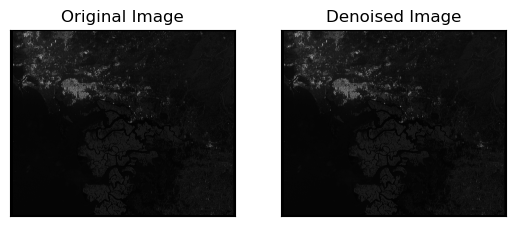

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)


True

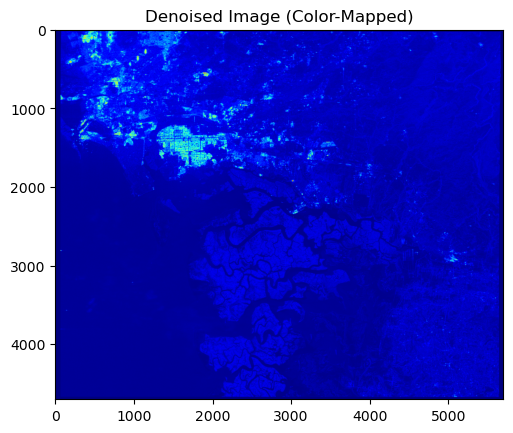

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()


In [4]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")


Mean Squared Error: 8.293586935423665


In [5]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")


C:\Users\HC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Structural Similarity Index (SSIM): 0.9284885208959828


In [6]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')


Original pixel value at (150, 150): 24
Denoised pixel value at (150, 150): 25


Original Image Amplitude (Magnitude):
[[1700.         5538.04852706 3240.68156475 ... 4181.20561815
  3240.68156475 5538.04852706]
 [ 604.63646484 4847.85094242 3830.56476833 ... 3364.27499359
  3706.12961248 6909.67622798]
 [4967.87488098 4012.71118261 5424.47032011 ... 2712.90909731
  3879.027397   4662.61814036]
 ...
 [5322.47323937 1959.76039062 5446.68551492 ... 5646.65910045
  4263.53801086 5320.24798108]
 [4967.87488098 4662.61814036 3879.027397   ... 8632.69711044
  5424.47032011 4012.71118261]
 [ 604.63646484 6909.67622798 3706.12961248 ... 7705.98348381
  3830.56476833 4847.85094242]]
Denoised Image Amplitude (Magnitude):
[[ 698.          709.93256659 2345.10763524 ...  511.00638114
  2345.10763524  709.93256659]
 [1551.51182657 1019.70015921 1999.34206148 ...  689.88826819
  2047.97301782  659.6293951 ]
 [1623.25062113 1134.04368883 1348.2473921  ... 1768.25390541
   519.18335205 1707.78222972]
 ...
 [1479.68346366 1029.5399597  1583.05242666 ...  942.0019844
   707.56359256

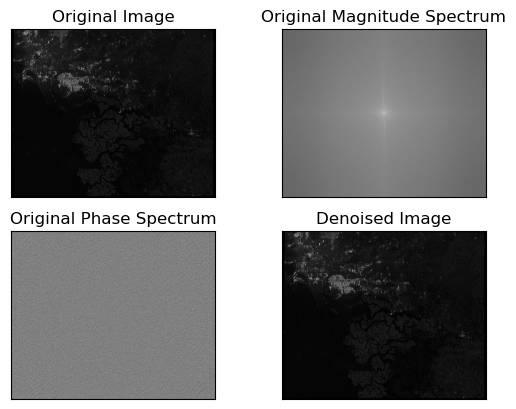

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread("F:\Downloads\landsat\lab data-20231217T154337Z-001\lab data\HH-ALPSRP268500480-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")
